# Plotting with fed3

## Import `fed3.plot`

The plotting package within fed3, `fed3.plot` is not imported by default.  Make an explicit call to import it:

In [1]:
import fed3
import fed3.plot as fplot

For the purposes of this documentation, matplotlib will be used to set the default figure size.

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100

## Example data

The following sections will make use of some example data, provided by the [`fed3.examples`](https://earnestt1234.github.io/fed3/fed3/examples/index.html) package:

In [3]:
feds = fed3.load_examples('justin', deduplicate_index='offset', offset='1s')
f = feds[0]

## Basic plotting

The following section will intoduce the basics of plotting with fed3.  

### The "Hello World" plot

The simplest plot is the [line plot](https://earnestt1234.github.io/fed3/fed3/plot/simple.html#fed3.plot.simple.line), which plots a variable of interest over time.  This demonstrates the syntax that applies to almost all plotting functions: pass the data to be plotted as the first argument (the FEDFrame(s)) followed by any options.  In this case, the `y` parameter specifies the variable to be plotted: 

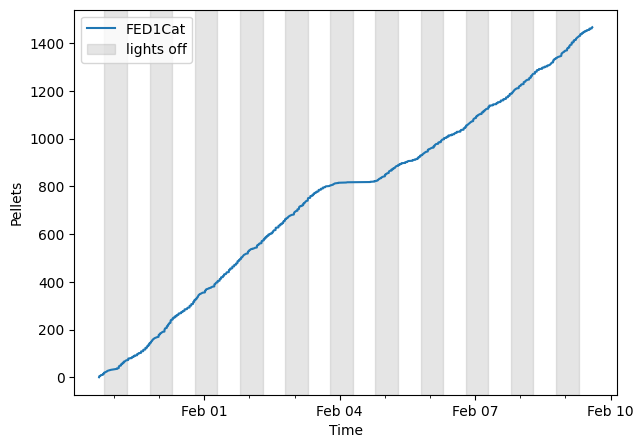

In [4]:
fplot.line(f, y='pellets')

plt.show()

Many other `y` values can be specified - they link to the functions defined within [`fed3.metrics`](https://earnestt1234.github.io/fed3/fed3/metrics/index.html).  Call [`fed3.list_metrics()`](https://earnestt1234.github.io/fed3/fed3/index.html#fed3.list_metrics) to see all available options.

### Plotting multiple FEDs

Most plots are able to plot data from multiple FEDs, either as separate or aggregated curves.  The structure of the passed data determines this behavior:

- A single FEDFrame ([`fed3.core.fedframe.FEDFrame`](https://earnestt1234.github.io/fed3/fed3/core/fedframe.html#fed3.core.fedframe.FEDFrame)) specifies a single line to be plotted (as shown above)
- A `list` (or other 1D collection) of FEDFrames will plot each as separate curves
- A `dict` is used to aggregate data.  Within each dictionary, the key is the group label, and the value is the collection of FEDFrames belonging to that group.

#### List of FEDs

The following is an example of the second option - data for each FED are plotted as individual lines.

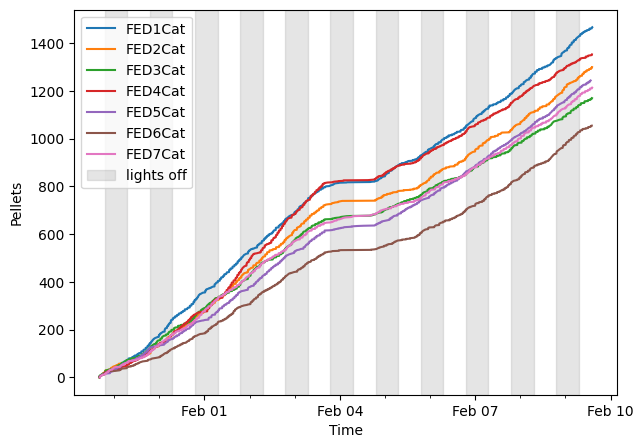

In [5]:
fplot.line(feds, y='pellets')
plt.show()

#### Grouping

To create a group average, pass a dictionary indicating group membership:

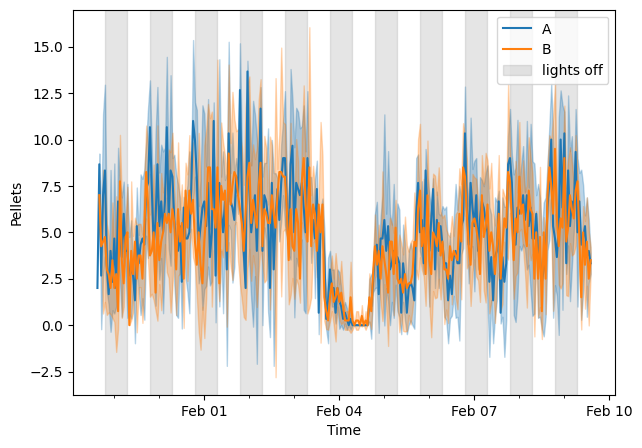

In [6]:
groups = {'A' : feds[0:3], 'B' : feds[3:]}

fplot.line(groups, y='pellets')
plt.show()

In [7]:
bp = feds[0]['Pellet_Count'].diff().copy()
feds[0].event_type(bp.index[0])

'Poke'

A few things have changed in the above plot:

- **There are two curves plotted only**; one for each member of the dictionary passed.  The curves correspond to the average pellet retrieval, and the shaded error bar correspond to the standard deviation.
- **The measure of pellet retrieval has changed from cumulative to absolute**.  I.e., the y-axis corresponds to the number of pellets retrieved (on average) within each temporal bin (by default, 1 hour).  This is the default behavior of the `y='pellets'` metric ([see here](https://earnestt1234.github.io/fed3/fed3/metrics/core.html#fed3.metrics.core.pellets)).

There are options to tweak the behavior for grouping.  `agg` sets the aggregation method for the grouped data, and `var` sets the measure of error.  Furthermore, the `bins` parameter sets the resolution of temporal averaging:

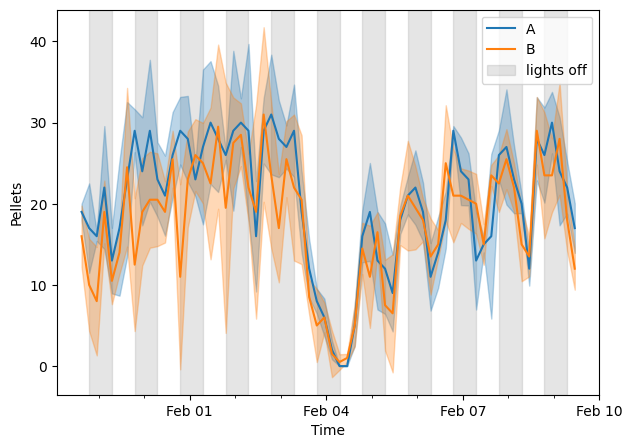

In [8]:
fplot.line(groups, y='pellets', bins='4H', agg='median')
plt.show()

## Integrating with matplotlib

Plotting with fed3 is all implemented through calls to [matplotlib](https://matplotlib.org/).  Thus, you can make use of typical matplotlib routines to customize your plots:

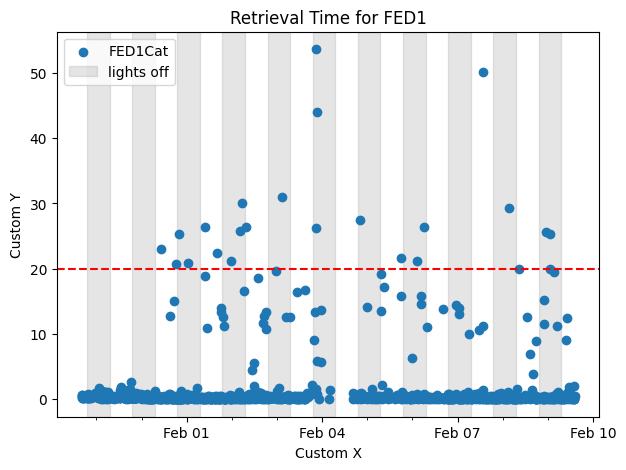

In [9]:
import matplotlib.pyplot as plt

fplot.scatter(f, y='rt')

plt.title('Retrieval Time for FED1')
plt.xlabel('Custom X')
plt.ylabel('Custom Y')
plt.axhline(20, color='red', linestyle='dashed')

plt.show()

Most plots can also be directed to a given [matplotlib axis](https://matplotlib.org/stable/api/axes_api.html), using the `ax` argument:

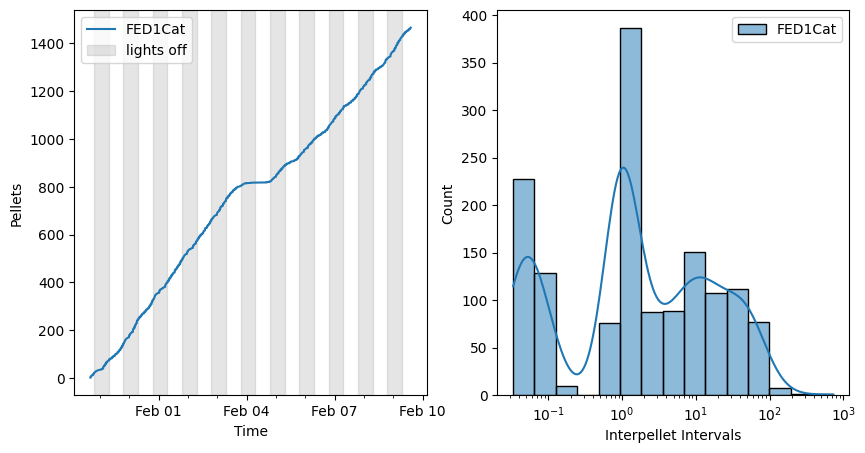

In [10]:
# create layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot
fplot.line(f, y='pellets', ax=ax1)
fplot.ipi(f, ax=ax2)
plt.show()

This can also be used to plot different metrics from one FED on the same axis:

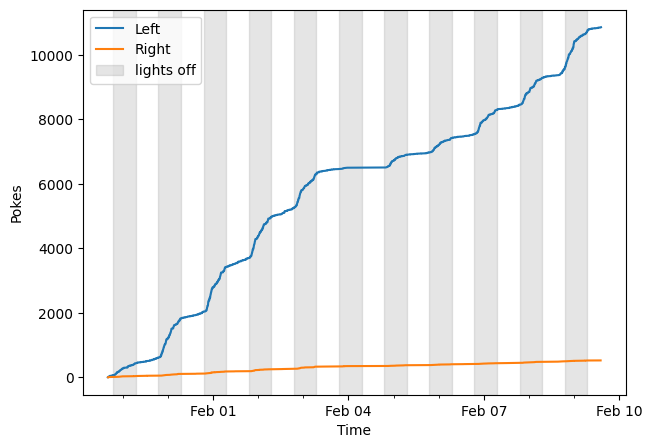

In [11]:
# create figure and axis
fig = plt.figure()
ax = plt.subplot()

fplot.line(f, y='left_pokes', ax=ax, shadedark=False, label='Left')
fplot.line(f, y='right_pokes', ax=ax, label='Right')
plt.ylabel('Pokes')
plt.show()

Note that above, `shadedark=False` is specified for the first plot to prevent the dark periods from being drawn twice.  An alternative to this is to set the default behavior to not draw dark periods.  This can be done by setting `fed3.plot.OPTIONS['default_shadedark'] = False`.  You can then "opt in" to shading the darkness with the `shadedark` argument, or by calling `fed3.plot.shadedark.shade_darkness()`.

There is also a similar option for the legend, `fed3.plot.OPTIONS['default_legend']`.

### matplotlib keywords

Most plots also accept keyword arguments which are passed to drawing functions from matplotlib, allowing for more specific customizations.  For example, `fed3.plot.line()` passes arguments to [`matplotlib.axes.Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html):

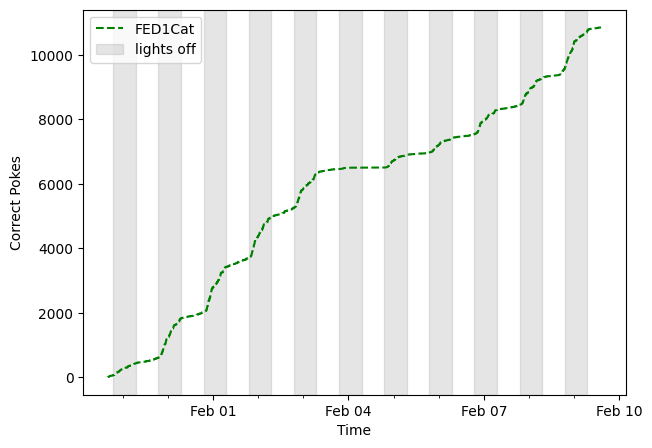

In [12]:
fplot.line(f, y='correct_pokes', color='green', linestyle='dashed')
plt.show()

When plotting multiple FEDs, specifying a single value for a keyword argument applies it to all FEDs.  To specify particular styles for particular FEDs, dictionaries can be used:

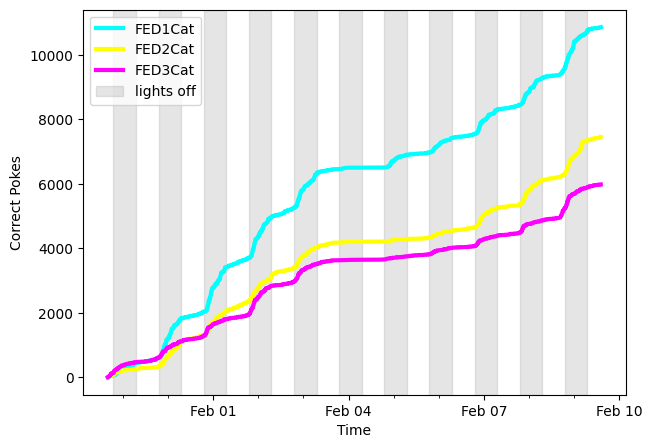

In [13]:
styles = {
    feds[0].name : {'color': 'cyan'},
    feds[1].name : {'color': 'yellow'},
    feds[2].name : {'color': 'magenta'}
}

fplot.line(feds[0:3], y='correct_pokes', lw=3, line_kwargs=styles)
plt.show()

The above method can be somewhat cumbersome to setup.  One alternative that fed3 provides is the "argument helper", abbreviated with `fed3.plot.argh()`.  This can be used to pass a series of arguments to a series of curves being plotted.  To generate a similar plot as above, do:

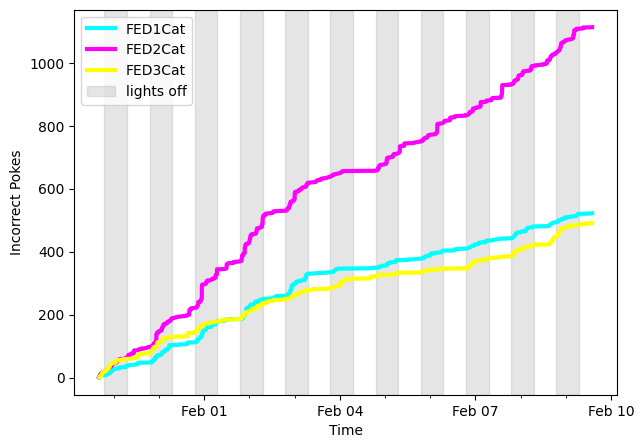

In [14]:
fplot.line(feds[0:3], y='error_pokes', lw=3, color=fplot.argh(['cyan', 'magenta', 'yellow']))
plt.show()

When plotting grouped data, the group names are used as keys instead of individual FED names.  Also, depending on the plotting function, there may be specific arguments to manage keywords directed at different elements:

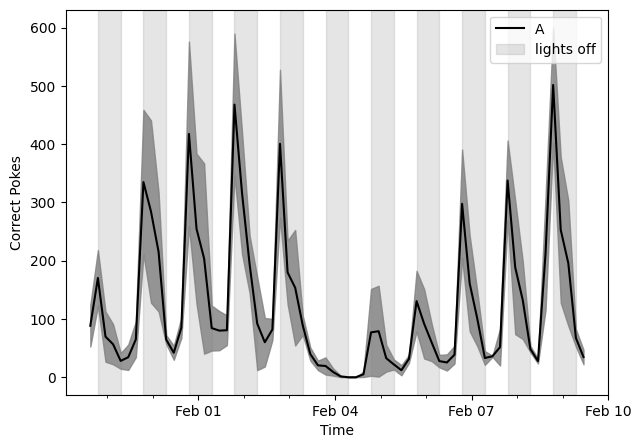

In [15]:
fplot.line({'A': feds[0:3]}, y='correct_pokes', bins='4H',
           line_kwargs={'color':'black'}, error_kwargs={'color':'gray', 'alpha':0.8})
plt.show()

## Getting plot data

Plotting functions from fed3 can also be used as jumping off points for analyses or other plotting code.  Most functions have an `output` argument which determines the object returned.  Options are typically:

- 'plot': the matplotlib Figure
- 'data': a pandas DataFrame containing the data being plotted
- 'dataonly': similar to 'data', except the plot is not created
- 'both': a tuple of the figure and data

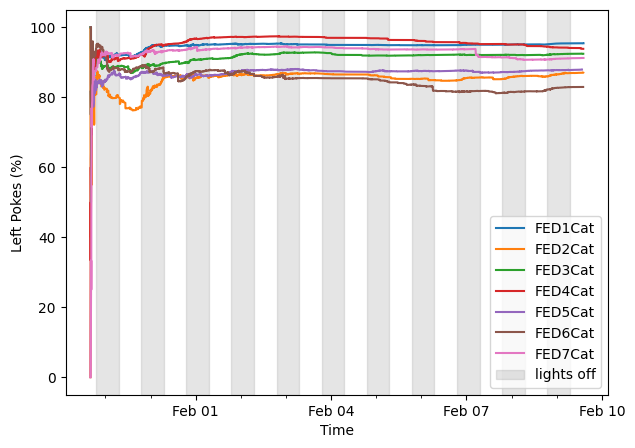

,FED1Cat,FED2Cat,FED3Cat,FED4Cat,FED5Cat,FED6Cat,FED7Cat
2021-01-29 15:59:31,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2021-01-29 15:59:53,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2021-01-29 16:01:01,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2021-01-29 16:01:52,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2021-01-29 16:02:50,NaN,NaN,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-09 14:09:31,NaN,NaN,NaN,NaN,NaN,NaN,91.213188
2021-02-09 14:12:00,95.412602,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09 14:13:56,NaN,NaN,NaN,NaN,NaN,NaN,91.214594
2021-02-09 14:14:00,95.413005,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data = fplot.line(feds, y='cumulative_left_percent', output='data')
plt.show()
display(data)